# Problem Statement
* The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.
* The vehicle may be viewed from one of many different angles.

## 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
vehicleData = pd.read_csv("vehicle.csv")

## 2. Shape of the dataset

In [3]:
vehicleData.shape

(846, 19)

In [4]:
vehicleData.isnull().sum() # Check if there are any null values in data set

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

> There are many missing values.

In [5]:
vehicleData.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


## 3. Univariate analysis

### 3.1 Data types and description

In [6]:
vehicleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
vehicleData['class'] = vehicleData['class'].astype('category')
vehicleData['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [8]:
vehicleData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


### 3.2 Find missing values

In [9]:
vehicleData[pd.isnull(vehicleData['circularity'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,NaN,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,NaN,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


In [10]:
vehicleData[pd.isnull(vehicleData['distance_circularity'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
207,85,42.0,NaN,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
319,102,51.0,NaN,194.0,60.0,6,220.0,30.0,25.0,162,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186,bus


In [11]:
vehicleData[pd.isnull(vehicleData['radius_ratio'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,NaN,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,NaN,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,NaN,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,NaN,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


In [12]:
vehicleData[pd.isnull(vehicleData['pr.axis_aspect_ratio'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
222,100,50.0,81.0,197.0,NaN,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus


In [13]:
vehicleData[pd.isnull(vehicleData['scatter_ratio'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
249,85,34.0,53.0,127.0,58.0,6,NaN,58.0,17.0,121,137.0,197.0,127.0,70.0,NaN,20.0,185.0,189,car


In [14]:
vehicleData[pd.isnull(vehicleData['elongatedness'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
215,90,39.0,86.0,169.0,62.0,7,162.0,NaN,20.0,131,194.0,388.0,147.0,74.0,1.0,22.0,185.0,191,car


In [15]:
vehicleData[pd.isnull(vehicleData['pr.axis_rectangularity'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
237,85,45.0,65.0,128.0,56.0,8,151.0,45.0,NaN,145,170.0,332.0,186.0,81.0,1.0,10.0,179.0,184,bus
273,96,45.0,80.0,162.0,63.0,9,146.0,46.0,NaN,148,161.0,316.0,161.0,64.0,5.0,10.0,199.0,207,van


In [16]:
vehicleData[pd.isnull(vehicleData['scaled_variance'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
372,97,47.0,87.0,164.0,64.0,9,156.0,43.0,20.0,149,NaN,359.0,182.0,68.0,1.0,13.0,192.0,202,van
522,89,36.0,69.0,162.0,63.0,6,140.0,48.0,18.0,131,NaN,291.0,126.0,66.0,1.0,38.0,193.0,204,car


In [17]:
vehicleData[pd.isnull(vehicleData['scaled_variance.1'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
308,109,51.0,100.0,197.0,59.0,10,192.0,34.0,22.0,161,210.0,NaN,195.0,64.0,14.0,3.0,196.0,202,car
496,106,55.0,98.0,224.0,68.0,11,215.0,31.0,24.0,170,222.0,NaN,214.0,68.0,2.0,29.0,189.0,201,car


In [18]:
vehicleData[pd.isnull(vehicleData['scaled_radius_of_gyration'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
207,85,42.0,NaN,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
266,86,NaN,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus


In [19]:
vehicleData[pd.isnull(vehicleData['scaled_radius_of_gyration.1'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
192,93,43.0,76.0,149.0,57.0,7,149.0,44.0,19.0,143,172.0,335.0,176.0,NaN,14.0,0.0,189.0,194,car
329,89,38.0,80.0,169.0,59.0,7,161.0,41.0,20.0,131,186.0,389.0,137.0,NaN,5.0,15.0,192.0,197,car


In [20]:
vehicleData[pd.isnull(vehicleData['skewness_about'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
141,81,42.0,63.0,125.0,55.0,8,149.0,46.0,19.0,145,166.0,320.0,172.0,86.0,NaN,7.0,179.0,182,bus
177,89,44.0,72.0,160.0,66.0,7,144.0,46.0,19.0,147,166.0,312.0,169.0,69.0,NaN,1.0,191.0,198,bus
222,100,50.0,81.0,197.0,NaN,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus
249,85,34.0,53.0,127.0,58.0,6,NaN,58.0,17.0,121,137.0,197.0,127.0,70.0,NaN,20.0,185.0,189,car
285,89,48.0,85.0,189.0,64.0,8,169.0,39.0,20.0,153,188.0,427.0,190.0,64.0,NaN,5.0,195.0,201,car


In [21]:
vehicleData[pd.isnull(vehicleData['skewness_about.1'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car


In [22]:
vehicleData[pd.isnull(vehicleData['skewness_about.2'])]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
419,93,34.0,72.0,144.0,56.0,6,133.0,50.0,18.0,123,158.0,263.0,125.0,63.0,5.0,20.0,NaN,206,car


> The missing values seem random and the column values are continuous, so I replace them with median values.

### 3.3 Replace missing values with median

In [23]:
vehicleData.fillna(vehicleData.median(), inplace=True)
vehicleData.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3.4 Find duplicates

In [24]:
dups = vehicleData.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 3.5 Find outliers

In [25]:
X = vehicleData.drop(['class'], axis=1)
y = vehicleData[['class']]

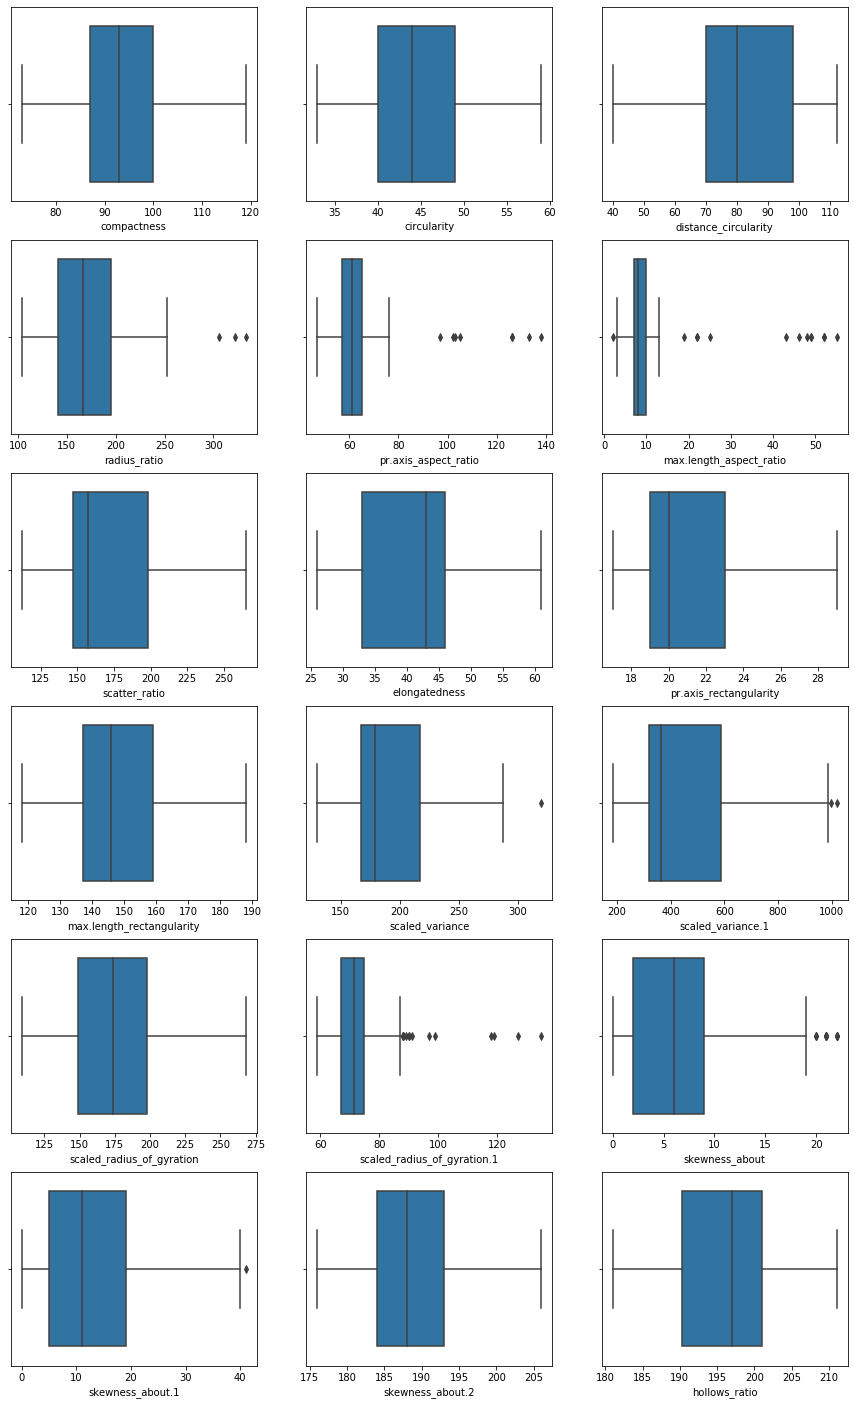

In [26]:
plt.figure(figsize=(15,25))
pos = 1
for i in X.columns:
    plt.subplot(6, 3, pos)
    sns.boxplot(X[i])
    pos += 1 

* These columns has many outliers:
> 1. radius_ratio
> 2. pr.axis_aspect_ratio
> 3. max.length_aspect_ratio
> 4. scaled_variance
> 5. scaled_variance.1
> 6. scaled_radius_of_gyration.1
> 7. skewness_about
> 8. skewness_about.1

### 3.6 Fix outliers

In [27]:
for i in X.loc[:,:]:
    q1, q2, q3 = vehicleData[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = X[i] > q3 + 1.5*IQR
    b = X[i] < q1 - 1.5*IQR
    X[i] = np.where(a, q3, X[i])
    X[i] = np.where(b, q1, X[i])

### 3.7 Verify outliers

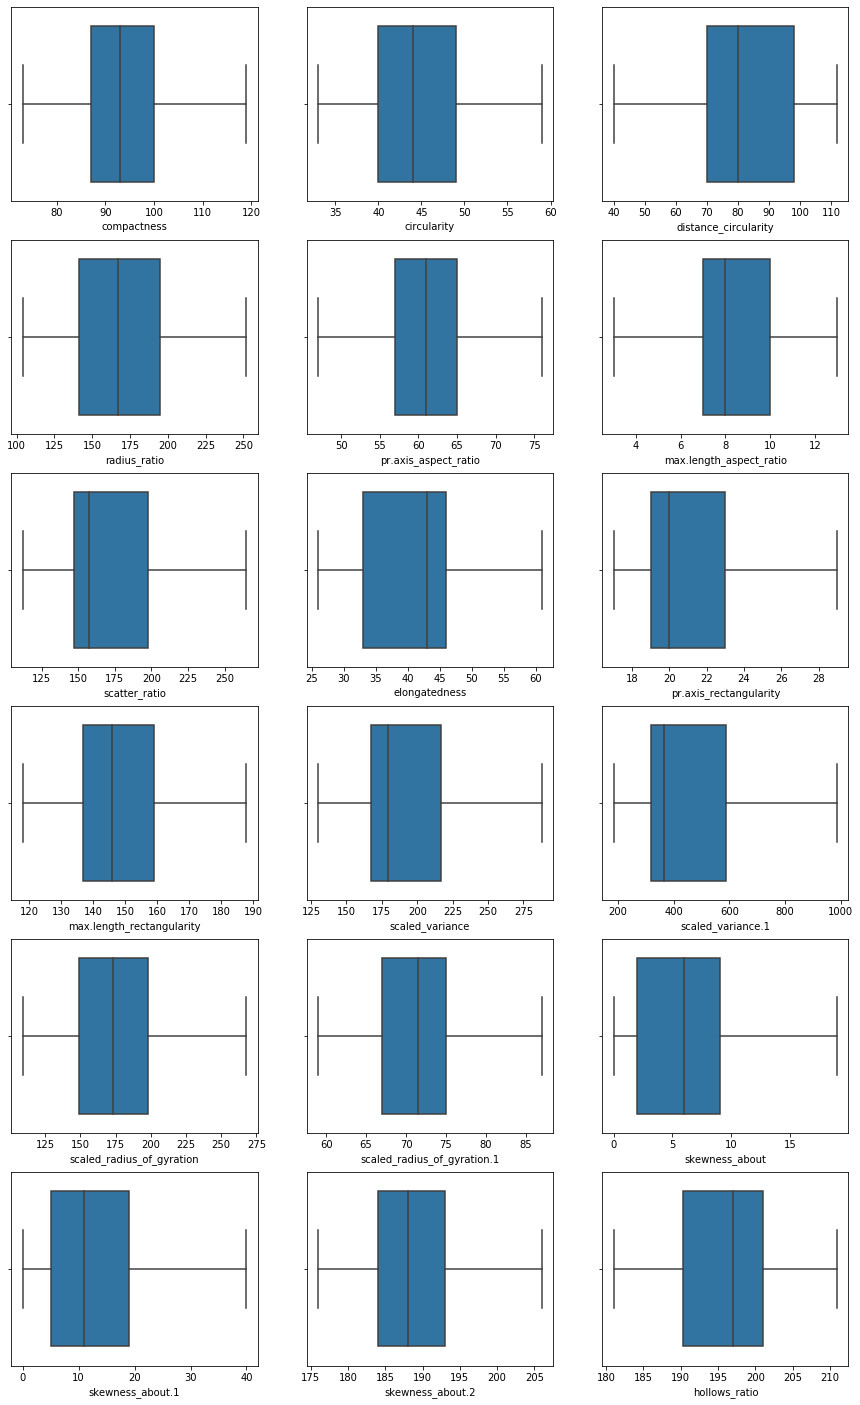

In [28]:
plt.figure(figsize=(15,25))
pos = 1
for i in X.columns:
    plt.subplot(6, 3, pos)
    sns.boxplot(X[i])
    pos += 1 

## 4. Bi-variate analysis

### 4.1 Generate correlation matrix

In [29]:
corr = X.corr()
corr_threshold = 0.9
corr.mask(abs(corr) <= corr_threshold, np.nan)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
circularity,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.961318,NaN,NaN,0.925816,NaN,NaN,NaN,NaN,NaN
distance_circularity,NaN,NaN,1.000000,NaN,NaN,NaN,0.905076,-0.911307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_ratio,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pr.axis_aspect_ratio,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max.length_aspect_ratio,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scatter_ratio,NaN,NaN,0.905076,NaN,NaN,NaN,1.000000,-0.971601,0.989751,NaN,0.959849,0.988402,NaN,NaN,NaN,NaN,NaN,NaN
elongatedness,NaN,NaN,-0.911307,NaN,NaN,NaN,-0.971601,1.000000,-0.948996,NaN,-0.946840,-0.954031,NaN,NaN,NaN,NaN,NaN,NaN
pr.axis_rectangularity,NaN,NaN,NaN,NaN,NaN,NaN,0.989751,-0.948996,1.000000,NaN,0.946023,0.982246,NaN,NaN,NaN,NaN,NaN,NaN
max.length_rectangularity,NaN,0.961318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> There are many dependent features.

### 4.2 Select features based on correlation

Compare the correlation between features and remove 1 of 2 features that have a correlation higher than corr_threshold

In [30]:
corr_columns = pd.DataFrame(np.full((1,corr.shape[1]), True, dtype=bool), index=[0], columns = corr.columns)
for i in range(corr_columns.shape[1]):
    if corr_columns.iloc[0,i]:
        for j in range(i+1, corr_columns.shape[1]):
            if abs(corr.iloc[i,j]) > corr_threshold:
                corr_columns.iloc[0,j] = False

selected_columns = corr_columns.columns[corr_columns.iloc[0] == True]
print('We only keep %2d independent columns: \n' %len(selected_columns.values), selected_columns)

We only keep 11 independent columns: 
 Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'pr.axis_rectangularity', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')


In [31]:
X = X[selected_columns]

### 4.3 Visualize using pairs plots after feature selection

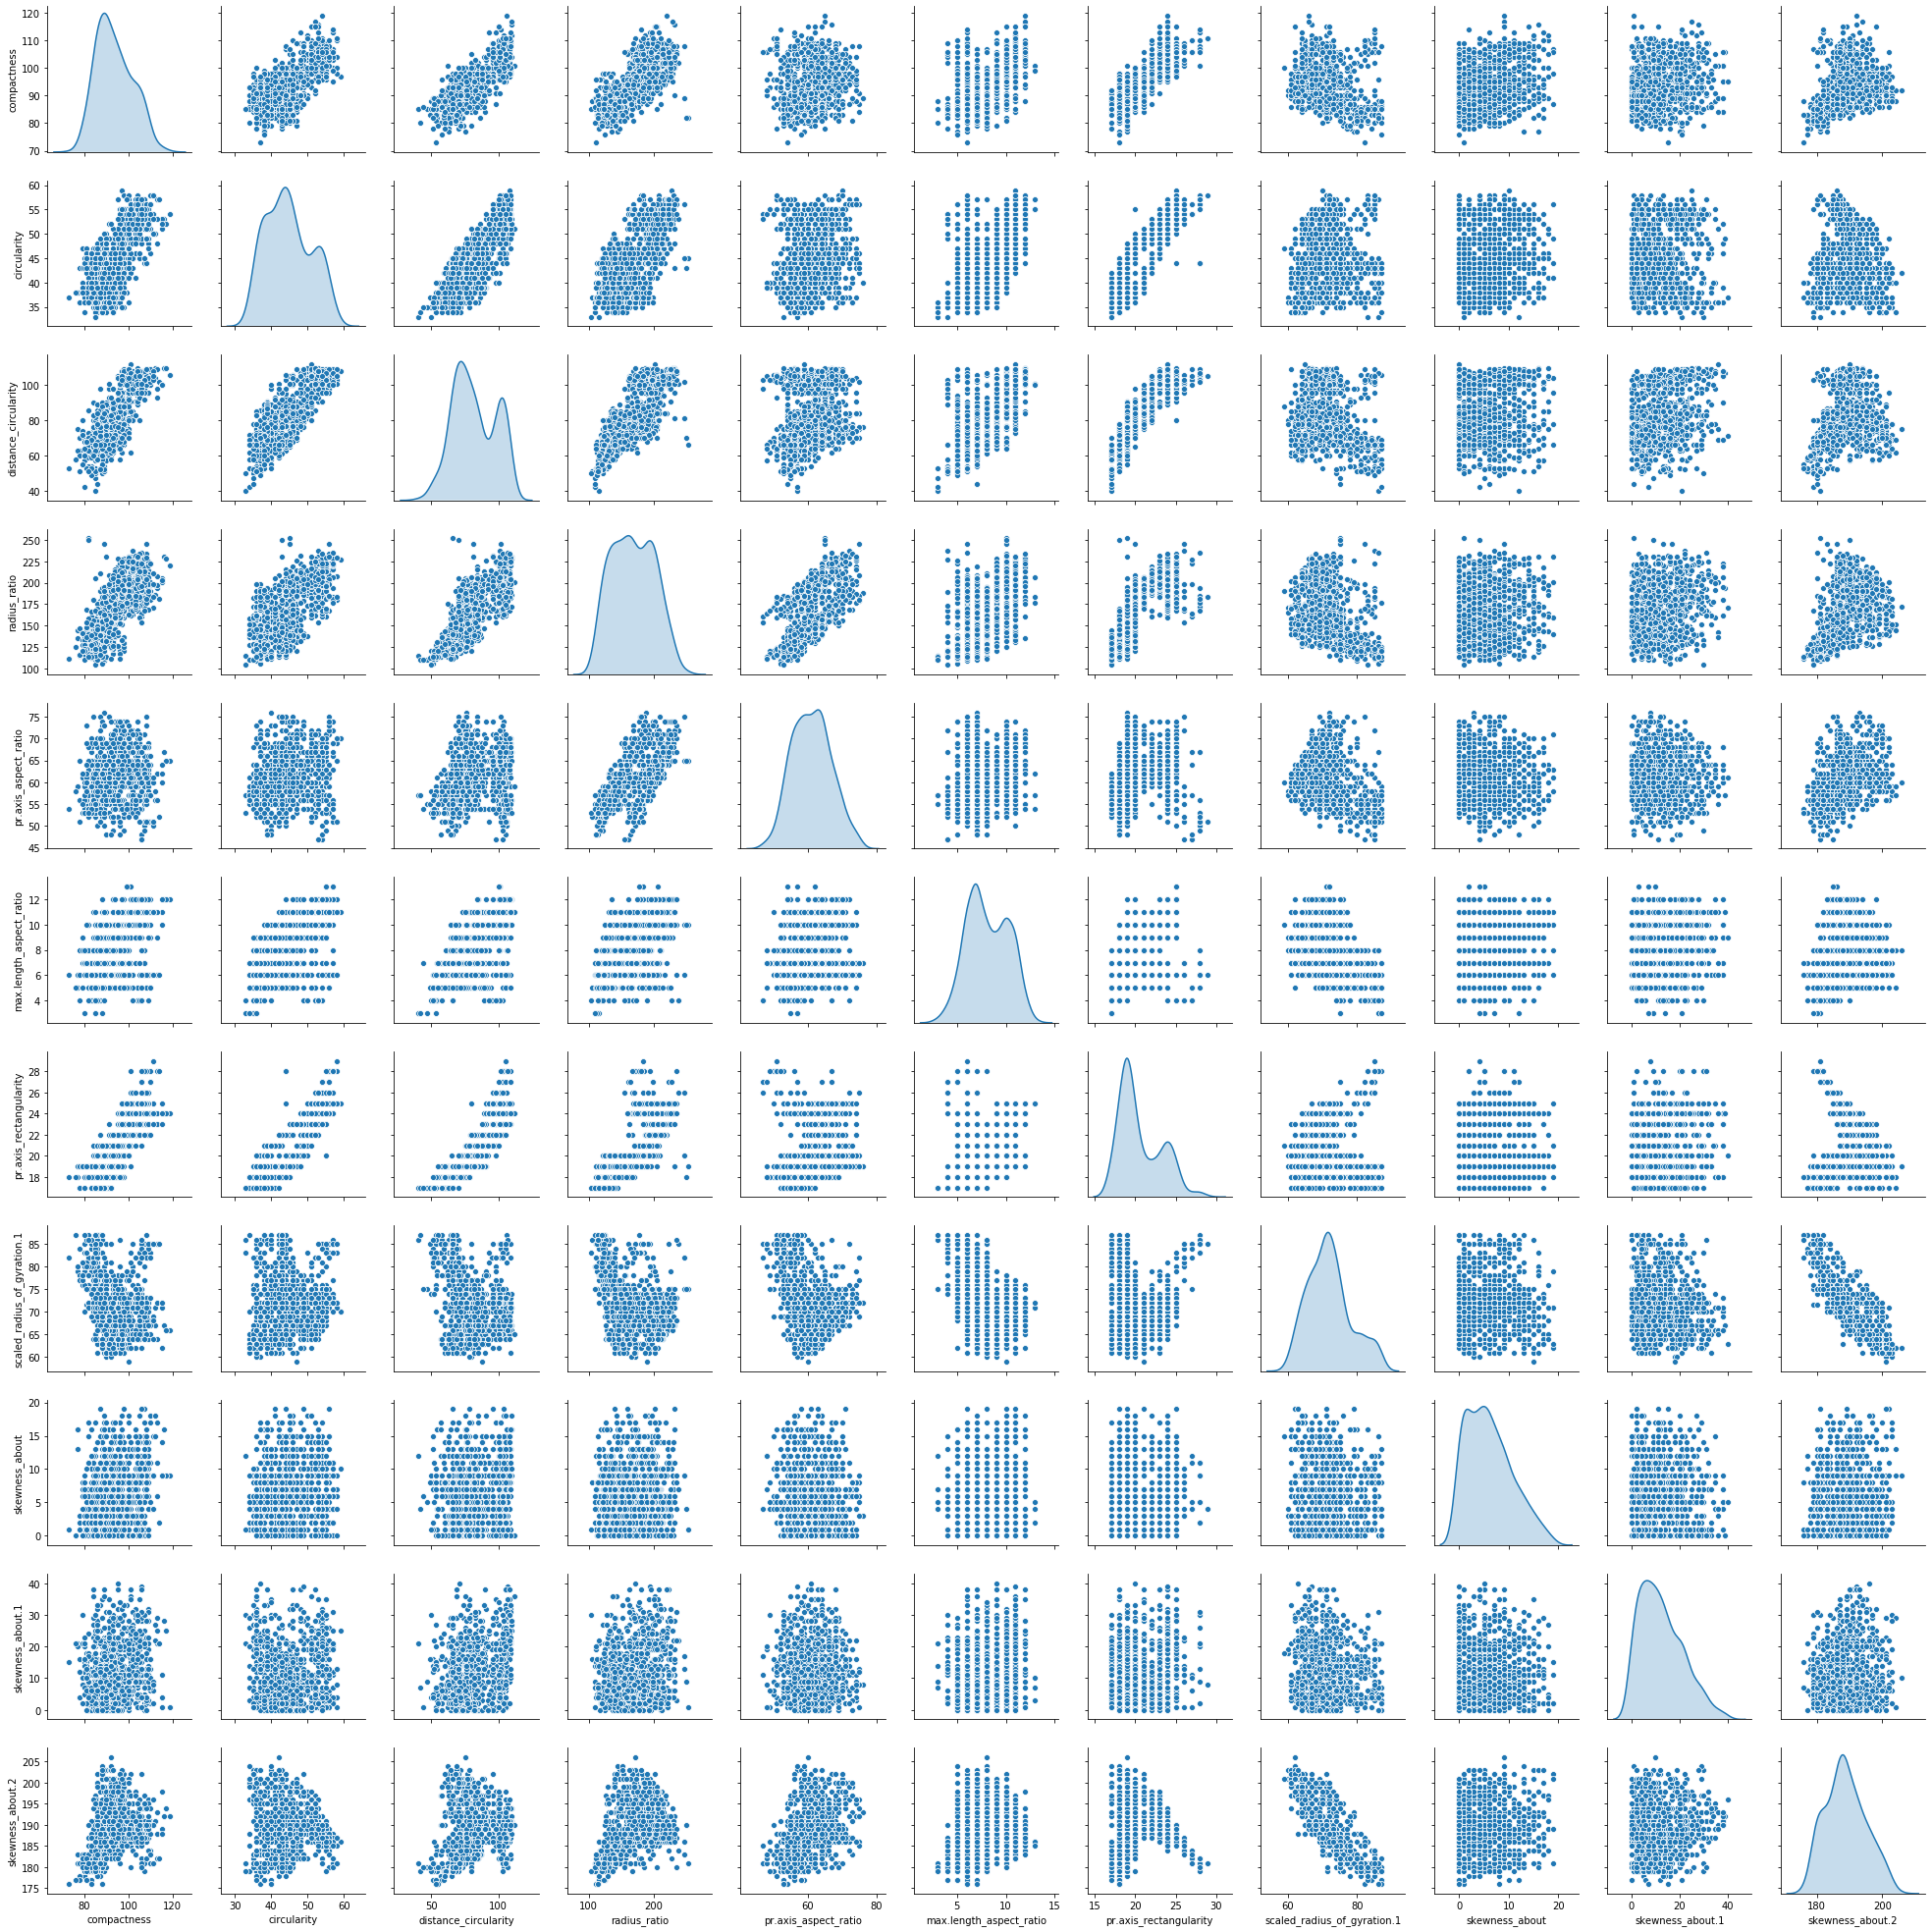

In [32]:
sns.pairplot(X, diag_kind='kde')
plt.show()

## 5. Create the training set and test set in ratio of 70:30

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape

(592, 11)

## 6. Scale features

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns)

# 7. Perform PCA analysis

In [35]:
# Generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_scaled.T) # the relevant covariance matrix
print('Covariance Matrix \n',cov_matrix)

# Generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('\nEigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
 [[ 1.00169205  0.68703756  0.7887976   0.72965924  0.19850747  0.47458991
   0.81094331 -0.24758262  0.19449182  0.14781446  0.29261981]
 [ 0.68703756  1.00169205  0.79444139  0.65367585  0.22175731  0.53267347
   0.83957602  0.0649819   0.14045064 -0.00785578 -0.09995329]
 [ 0.7887976   0.79444139  1.00169205  0.81020036  0.25839322  0.63675379
   0.89175665 -0.2408912   0.08968645  0.27200606  0.15851979]
 [ 0.72965924  0.65367585  0.81020036  1.00169205  0.66514047  0.46032003
   0.75748947 -0.39585836  0.03382311  0.1910286   0.4056578 ]
 [ 0.19850747  0.22175731  0.25839322  0.66514047  1.00169205  0.15548259
   0.17106294 -0.3469711  -0.03577689 -0.02105589  0.40647181]
 [ 0.47458991  0.53267347  0.63675379  0.46032003  0.15548259  1.00169205
   0.44753015 -0.35576137  0.04899575  0.13989346  0.09563339]
 [ 0.81094331  0.83957602  0.89175665  0.75748947  0.17106294  0.44753015
   1.00169205  0.03234903  0.07790462  0.22056375 -0.02434303]
 [-0.24758262  0.0649

In [36]:
# The "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 43.81609252  63.02443465  73.00244707  82.49756022  89.75418844
  95.22857495  97.00172749  98.31553896  99.11255958  99.65134606
 100.        ]


> We can reduce to 6 PCA dimensions, which covers more than 95% variance

In [37]:
n_PCA_components = 6

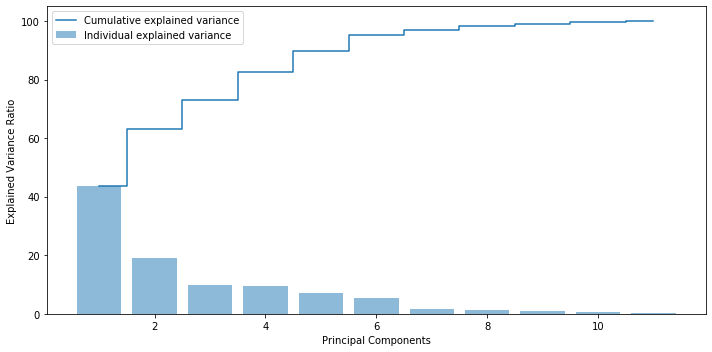

In [38]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## 8. Use PCA command from sklearn

In [39]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only n_PCA_components PCA dimensions (dimensionality reduction from 11 to n_PCA_components)
pca = PCA(n_components=n_PCA_components)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### 8.1 The eigenvalues

In [40]:
print(pca.explained_variance_)

[4.82792546 2.11649279 1.09943853 1.04622973 0.79957975 0.60320144]


### 8.2 The eigenvectors

In [41]:
print(pca.components_)

[[ 0.39448808  0.36624444  0.42733989  0.41721922  0.20309045  0.29989779
   0.39530578 -0.16961264  0.05868726  0.10707914  0.14974397]
 [ 0.06535679  0.30383132  0.11947303 -0.11700841 -0.32317931  0.02008276
   0.27612907  0.57821651  0.04981961 -0.04071857 -0.59655718]
 [-0.05392795 -0.16963816  0.1048817  -0.06073834 -0.2720329   0.12757858
   0.05210424 -0.07986371 -0.48926258  0.78219078 -0.05526135]
 [ 0.15848442 -0.08547259  0.03096475 -0.21444481 -0.48405012  0.12607926
  -0.04058217 -0.18062544  0.74635884  0.2437074   0.1404064 ]
 [ 0.02162417 -0.08071326 -0.04839245  0.2140583   0.35889229 -0.64664218
   0.12852491  0.27557277  0.31408687  0.45449417  0.01518791]
 [ 0.40839941 -0.02652866  0.03203294 -0.02404188 -0.47611721 -0.53896755
   0.22543173 -0.04314419 -0.29775177 -0.24333472  0.33642178]]


### 8.3 Percentage of variation explained by each eigenvector

In [42]:
print(pca.explained_variance_ratio_)

[0.43816093 0.19208342 0.09978012 0.09495113 0.07256628 0.05474387]


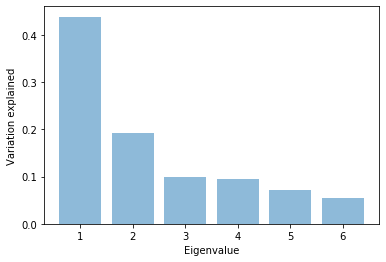

In [43]:
plt.bar(list(range(1,n_PCA_components+1)),pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigenvalue')
plt.show()

In [44]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [0.43816093 0.63024435 0.73002447 0.8249756  0.89754188 0.95228575]


### 8.4 Transform data to components formed

In [45]:
columns = ['pca_%i' % i for i in range(n_PCA_components)]
X_train_scaled_pca = pd.DataFrame(pca.transform(X_train_scaled), columns=columns, index=X_train_scaled.index)
X_test_scaled_pca = pd.DataFrame(pca.transform(X_test_scaled), columns=columns, index=X_test_scaled.index)
X_train_scaled_pca.shape

(592, 6)

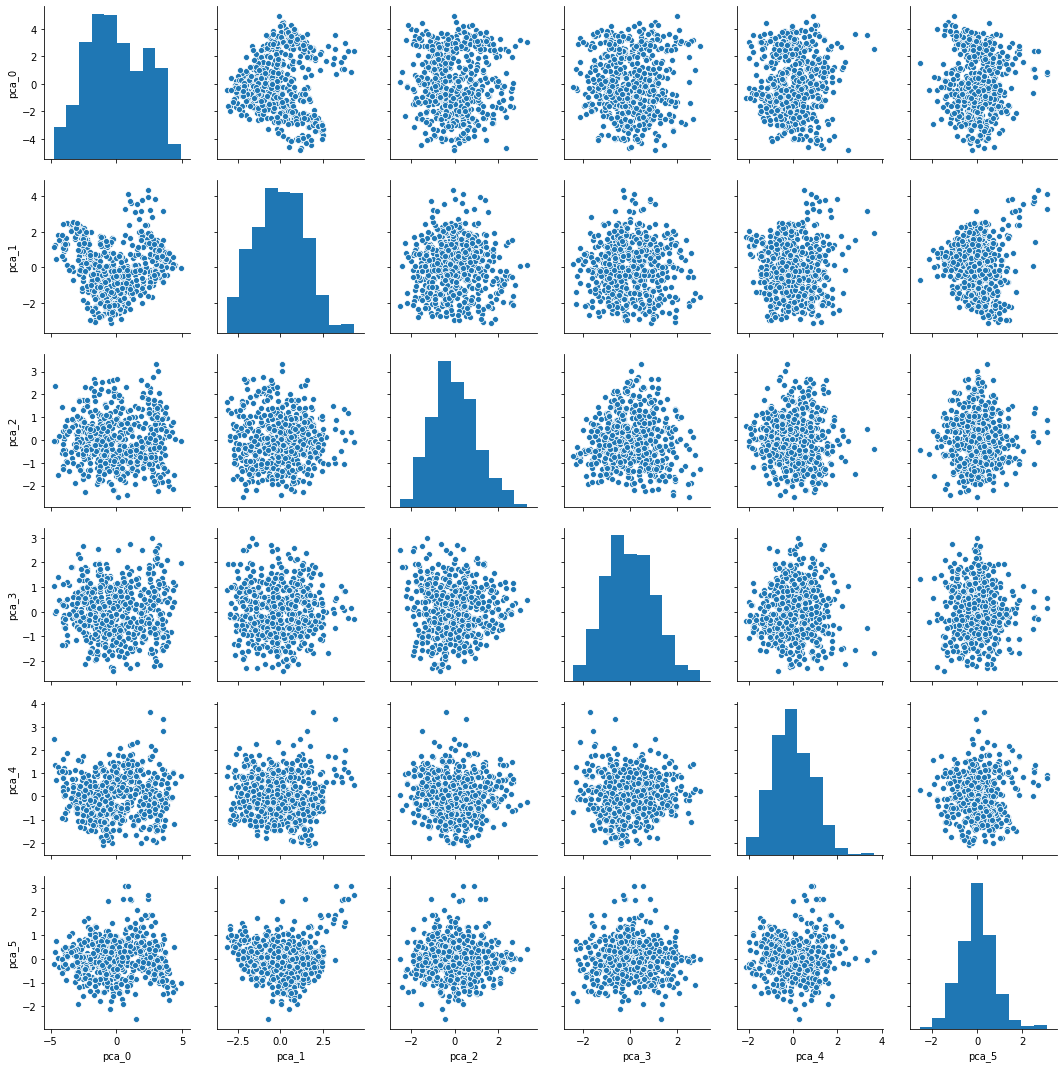

In [46]:
sns.pairplot(pd.DataFrame(X_train_scaled_pca))

In [47]:
X_train_scaled_pca.corr().mask(abs(X_train_scaled_pca.corr()) <= corr_threshold, np.nan)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5
pca_0,1.0,NaN,NaN,NaN,NaN,NaN
pca_1,NaN,1.0,NaN,NaN,NaN,NaN
pca_2,NaN,NaN,1.0,NaN,NaN,NaN
pca_3,NaN,NaN,NaN,1.0,NaN,NaN
pca_4,NaN,NaN,NaN,NaN,1.0,NaN
pca_5,NaN,NaN,NaN,NaN,NaN,1.0


> All PCA components are quite independent.

## 9. Use Support vector machines + Grid search + Cross validation

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

K=5
parameters = [{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}]

### 9.1 Without PCA

In [49]:
svc_grid = GridSearchCV(SVC(), parameters, cv=K)
svc_grid.fit(X_train_scaled, y_train)
print("X_train_scaled svc_grid acc:" + str(svc_grid.score(X_train_scaled, y_train)))
print("X_test_scaled svc_grid acc:" + str(svc_grid.score(X_test_scaled, y_test)))
print("svc_grid.best_params_: " + str(svc_grid.best_params_))

X_train_scaled svc_grid acc:0.9628378378378378
X_test_scaled svc_grid acc:0.9251968503937008
svc_grid.best_params_: {'C': 1, 'kernel': 'rbf'}


### 9.2 With PCA

In [50]:
svc_pca_grid = GridSearchCV(SVC(), parameters, cv=K)
svc_pca_grid.fit(X_train_scaled_pca, y_train)
print("X_train_scaled_pca svc_pca_grid acc:" + str(svc_pca_grid.score(X_train_scaled_pca, y_train)))
print("X_test_scaled_pca svc_pca_grid acc:" + str(svc_pca_grid.score(X_test_scaled_pca, y_test)))
print("svc_pca_grid.best_params_: " + str(svc_pca_grid.best_params_))

X_train_scaled_pca svc_pca_grid acc:0.9256756756756757
X_test_scaled_pca svc_pca_grid acc:0.8818897637795275
svc_pca_grid.best_params_: {'C': 1, 'kernel': 'rbf'}


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


> Model with PCA loses around 3.7% training and 4.5% testing acc comparing to the one without PCA.<br>
Meanwhile, it uses much less features (6 << 11), thus is much faster on large dataset.